In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


## 텐서플로우 맛보기

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# MNIST dataset download
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Model 생성, compile
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Training / Evaluation
model.fit(x_train, y_train, epochs=10)

model.evaluate(x_test,  y_test)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2916 - accuracy: 0.9158
Epoch 2/10
1875/1875 [==============================] - 2s 911us/step - loss: 0.1404 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1053 - accuracy: 0.9678
Epoch 4/10
1875/1875 [==============================] - 2s 992us/step - loss: 0.0879 - accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.0738 - accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0650 - accuracy: 0.9797
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0587 - accuracy: 0.9817
Epoch 8/10
1875/1875 [==============================] - 2s 998us/step - loss: 0.0537 - accuracy: 0.9824
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0490 - accuracy: 0.9845
Epoch 10/10
313/313 [==============================] - 0s 760us/step - los

[0.06996970623731613, 0.9799000024795532]

# 데이터를 탐색

In [7]:
idx = np.random.randint(len(x_train))
image = x_train[idx]

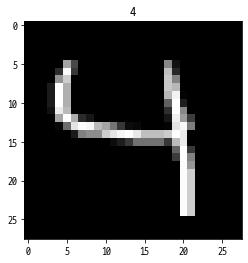

In [8]:
plt.imshow(image, cmap='gray')
plt.title(y_train[idx])
plt.show()

# Tensor

- multi-dimensional array를 나타내는 말
- TensorFlow의 기본 data type

In [9]:
# Hello World
hello = tf.constant([3,3], dtype=tf.float32)
print(hello)

tf.Tensor([3. 3.], shape=(2,), dtype=float32)


In [10]:
# 상수형 tensor는 아래와 같이 만들 수 있습니다
# 출력해보면 tensor의 값과 함께, shape과 내부의 data type을 함께 볼 수 있습니다
x = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])
print(x)
print(type(x))

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [11]:
# 아래와 같이 numpy ndarray나 python의 list도 tensor로 바꿀 수 있습니다
x_np = np.array([[1.0, 2.0],
                [3.0, 4.0]])
x_list = [[1.0, 2.0], 
         [3.0, 4.0]]

print(type(x_np))
print(type(x_list))

<class 'numpy.ndarray'>
<class 'list'>


In [12]:
x_np = tf.convert_to_tensor(x_np)
x_list = tf.convert_to_tensor(x_list)

print(type(x_np))
print(type(x_list))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [13]:
# 반대로 tensor를 다음과 같이 numpy ndarray로 바꿀 수도 있습니다
x.numpy()

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [14]:
print(type(x.numpy()))

<class 'numpy.ndarray'>


In [15]:
a = tf.ones((2,3))
b = tf.zeros((2,3))
c = tf.fill((2,2), 2)
print(a)
print(b)
print(c)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[2 2]
 [2 2]], shape=(2, 2), dtype=int32)


In [16]:
d = tf.zeros_like(c)
e = tf.ones_like(c)
print(d)
print(e)

tf.Tensor(
[[0 0]
 [0 0]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 1]
 [1 1]], shape=(2, 2), dtype=int32)


In [17]:
f = tf.eye(3)
print(f)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [18]:
g  = tf.range(10)
print(g)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


In [19]:
h = tf.random.uniform((2,2)) # np.rand
i = tf.random.normal((2,2))  # np.randn
print(h)
print(i)

tf.Tensor(
[[0.3402742  0.949939  ]
 [0.9923419  0.33005238]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-1.0656614   0.5575415 ]
 [ 0.21640205 -0.11968698]], shape=(2, 2), dtype=float32)


## Tensor의 속성

In [20]:
tensor = tf.random.normal((3,4))

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")

Shape of tensor: (3, 4)
Datatype of tensor: <dtype: 'float32'>


In [21]:
# 속성 변경
tensor = tf.reshape(tensor, (4, 3))
tensor = tf.cast(tensor, tf.int32)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")

Shape of tensor: (4, 3)
Datatype of tensor: <dtype: 'int32'>


## Variable

Variable은 변할 수 있는 상태를 저장하는데 사용되는 특별한 텐서입니다.
딥러닝에서는 학습해야하는 가중치(weight, bias)들을 variable로 생성합니다.

In [22]:
# tensor의 값 변경 - 변경 불가능
tensor = tf.ones((3,4))
print(tensor)

tensor[0,0] = 2.

tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [23]:
# variable 만들기, 값 변경
variable = tf.Variable(tensor)
print(variable)

variable[0,0].assign(2)
print(variable)

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[2., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>


In [24]:
# 초기값을 사용해서 Variable을 생성할 수 있습니다
initial_value = tf.random.normal(shape=(2, 2))
weight = tf.Variable(initial_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.8318212 ,  0.12494459],
       [-0.29486087, -0.71079797]], dtype=float32)>


In [25]:
# 아래와 같이 variable을 초기화해주는 initializer들을 사용할 수도 있습니다
weight = tf.Variable(tf.random_normal_initializer(stddev=1.)(shape=(2,2)))
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.5766896 ,  1.4590269 ],
       [-0.13886169,  0.42730862]], dtype=float32)>


### variable 
- .assign(value) : 값 변경
- .assign_add(increment) : 더하기
- .assign_sub(decrement) : 빼기

In [26]:
new_value = tf.random.normal(shape=(2,2))
print(new_value)
weight.assign(new_value)
print(weight)

tf.Tensor(
[[ 1.9268281   1.2319101 ]
 [-0.09446827  0.01961466]], shape=(2, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.9268281 ,  1.2319101 ],
       [-0.09446827,  0.01961466]], dtype=float32)>


In [27]:
added_value = tf.ones(shape=(2,2))
weight.assign_sub(added_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.92682815,  0.23191011],
       [-1.0944682 , -0.98038536]], dtype=float32)>


In [28]:
added_value = tf.ones(shape=(2,2))
weight.assign_add(added_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.9268281 ,  1.2319101 ],
       [-0.09446824,  0.01961464]], dtype=float32)>


## Indexing과 Slicing

In [29]:
a = tf.range(1, 13)
a = tf.reshape(a, (3, 4))
print(a)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)


In [30]:
# indexing
print(a[1])
print(a[0,-1])

tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [31]:
# slicing
print(a[1:-1])
print(a[:2, 2:])

tf.Tensor([[5 6 7 8]], shape=(1, 4), dtype=int32)
tf.Tensor(
[[3 4]
 [7 8]], shape=(2, 2), dtype=int32)


## Transpose

In [32]:
a = tf.range(16)
a = tf.reshape(a, (2, 2, -1))
print(a)

tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]], shape=(2, 2, 4), dtype=int32)


In [33]:
b = tf.transpose(a, (2, 0, 1))
print(b)

tf.Tensor(
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]], shape=(4, 2, 2), dtype=int32)


In [34]:
b = tf.transpose(a, perm = (2, 0, 1))
print(b)

tf.Tensor(
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]], shape=(4, 2, 2), dtype=int32)
